## Exploratory Data Analysis

### Pandas

In [1]:
import pandas as pd

### Load Data

In [2]:
filepath = r"C:\Users\thindle2016\OneDrive - Florida Atlantic University\GitHub\laboratory-workshops\electrophysiology\data\earthworm_55mmLtoG1_59mmLtoG2\earthworm_55mmLtoG1_59mmLtoG2_32_inverted.csv"

df = pd.read_csv(filepath)
df.head()

,Time (ms),Voltage (mV)
0,-1.321415,-73.99212
1,-1.318855,-73.99212
2,-1.316295,-73.99212
3,-1.313735,-73.99212
4,-1.311175,-69.50591


## Data Visualization

### Matplotlib and Seaborn

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns; sns.set()

### Preprocessing

In [4]:
y = df['Voltage (mV)']

y_min = y.min()
y_max = y.max()
y_bar = y.mean()
s = y.std()

df['Voltage Normalized'] = (y - y_bar) / s
df.head()

,Time (ms),Voltage (mV),Voltage Normalized
0,-1.321415,-73.99212,0.061788
1,-1.318855,-73.99212,0.061788
2,-1.316295,-73.99212,0.061788
3,-1.313735,-73.99212,0.061788
4,-1.311175,-69.50591,0.153319


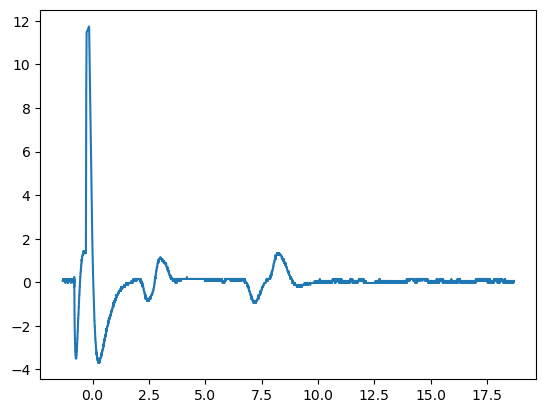

In [5]:
x = df['Time (ms)']
y = df['Voltage Normalized']

plt.plot(x, y)

In [6]:
from scipy.signal import find_peaks
import numpy as np

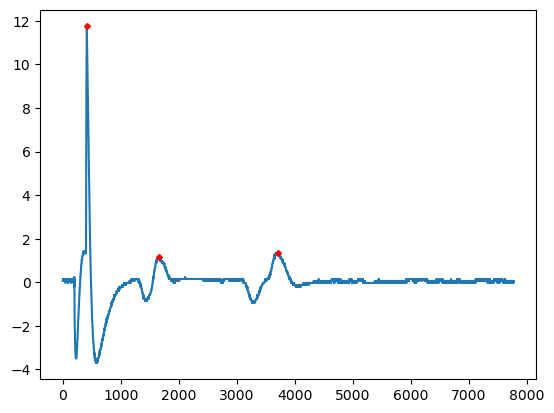

In [7]:
peaks, _ = find_peaks(y, height=1, distance=100)
np.diff(peaks)

plt.plot(y)
plt.plot(peaks, y[peaks], linestyle='None', marker='D', markersize=3, color='r')
plt.show()

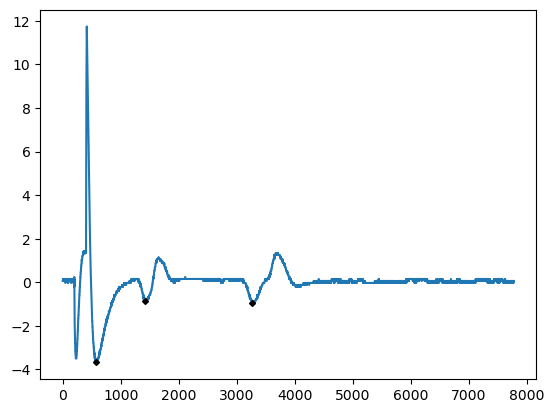

In [8]:
peaks, _ = find_peaks(-y, height=0.5, distance=750)
np.diff(peaks)

plt.plot(y)
plt.plot(peaks, y[peaks], linestyle='None', marker='D', markersize=3, color='k')
plt.show()